# Bike Sharing Analysis - Maching Learning 1 Assignment

A US bike-sharing provider BoomBikes aspires to understand the demand for shared bikes among the people. And to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

#### Business Goal
Requirement is to model the demand for shared bikes with the available independent variables to understand how exactly the demands vary with different features. The model should help to understand the demand dynamics of a new market.

---
## Step 1: Reading and Understanding the Data

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [588]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [589]:
# Import the numpy and pandas package

import numpy as np
import pandas as pd

In [590]:
# Read the given CSV file, and view some sample records

data = pd.read_csv("day.csv")
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Let's inspect the various aspects of our dataframe

In [591]:
data.shape

(730, 16)

In [592]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [593]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


---
## Step 2: Data Preprocessing

#### Data removal:
- Column 'instant' will be removed as it has no bearing on the target variable
- Column 'dteday' will be dropped as we already have 'yr', 'mnth' and 'weekday' columns representing date
- Columns 'casual' and 'registered' will be removed as the addition of values of these two columns results in the target variable.

In [594]:
data = data.drop(['instant','dteday', 'casual','registered'], axis=1)
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


#### Creation of dummy variables for categorical data

We will check columns season (`season`), month (`mnth`), weekday (`weekday`), weather (`weathersit`)

**Creating dummy variable for Column `season`**

For season column values are decoded as 1:spring, 2:summer, 3:fall, 4:winter.

In [595]:
# Checking the available values for season column
data['season'].value_counts()

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

Creating dummy variables for season column. 
Prefix used is `season` so values are created as `season_1`, `season_2`. 
`drop_first` is used to drop the redundant column, which will result dropping `season_1` column.

In [596]:
seasons = pd.get_dummies(data['season'], dtype=int, prefix='season', drop_first=True)
seasons

,season_2,season_3,season_4
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
725,0,0,0
726,0,0,0
727,0,0,0
728,0,0,0


Mapping season columns to following names:
season_2 -> season_summer; season_3 -> season_fall; season_4 -> season_winter

In [597]:
seasons.rename(columns={'season_2':'season_summer', 'season_3': 'season_fall', 'season_4': 'season_winter'}, inplace=True)
seasons

,season_summer,season_fall,season_winter
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
725,0,0,0
726,0,0,0
727,0,0,0
728,0,0,0


Adding `season` columns to the main dataset and dropping the original column

In [598]:
data = pd.concat([data, seasons], axis = 1)

In [599]:
data.drop('season', axis=1, inplace=True)
data.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,season_winter
0,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0,0,0
1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,0,0,0
2,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0
3,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0
4,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0


**Creating dummy variable for Column Month (`mnth`)**

For mnth column values are decoded as 1:Jan, 2:Feb, 3:Mar, 4:Apr and so on till 12:Dec.

In [600]:
# Checking the available values for mnth column
data['mnth'].value_counts()

mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64

Creating dummy variables for `mnth` column. 
Prefix used is `mnth` so values are created as `mnth_1`, `mnth_2` and so on till `mnth_12`. 
`drop_first` is used to drop the redundant column, which will result in dropping `mnth_1` column.

In [601]:
months = pd.get_dummies(data['mnth'], dtype=int, prefix='mnth', drop_first=True)
months

,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
725,0,0,0,0,0,0,0,0,0,0,1
726,0,0,0,0,0,0,0,0,0,0,1
727,0,0,0,0,0,0,0,0,0,0,1
728,0,0,0,0,0,0,0,0,0,0,1


Adding `mnth` columns to the main dataset and dropping the original column

In [602]:
data = pd.concat([data, months], axis = 1)

In [603]:
data.drop('mnth', axis=1, inplace=True)
data.head()

,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,...,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12
0,0,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,...,0,0,0,0,0,0,0,0,0,0
3,0,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,...,0,0,0,0,0,0,0,0,0,0
4,0,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,...,0,0,0,0,0,0,0,0,0,0


Mapping month (`mnth`) columns to following names:
mnth_2 -> mnth_feb; mnth_3 -> mnth_mar; mnth_4 -> mnth_apr and so on till mnth_12 -> mnth_dec

In [604]:
data.rename(columns={'mnth_2':'mnth_feb', 'mnth_3': 'mnth_mar', 'mnth_4': 'mnth_apr', 'mnth_5':'mnth_may', 'mnth_6':'mnth_jun', 'mnth_7':'mnth_jul', 'mnth_8':'mnth_aug', 'mnth_9':'mnth_sep','mnth_10':'mnth_oct','mnth_11':'mnth_nov','mnth_12':'mnth_dec'}, inplace=True)
data.head()

,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,...,mnth_mar,mnth_apr,mnth_may,mnth_jun,mnth_jul,mnth_aug,mnth_sep,mnth_oct,mnth_nov,mnth_dec
0,0,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,...,0,0,0,0,0,0,0,0,0,0
3,0,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,...,0,0,0,0,0,0,0,0,0,0
4,0,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,...,0,0,0,0,0,0,0,0,0,0


**Creating dummy variable for Column `weekday`**

For `weekday` column values are decoded as 0:Sun, 1:Mon, 2:Tue, 3:Wed and so on till 6:Sat.

In [605]:
# Checking the available values for weekday column
data['weekday'].value_counts()

weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64

Creating dummy variables for `weekday` column. 
Prefix used is `weekday` so values are created as `weekday_0`, `weekday_1` and so on till `weekday_6`. 
`drop_first` is used to drop the redundant column, which will result in dropping `weekday_0` column.

In [606]:
weekdays = pd.get_dummies(data['weekday'], dtype=int, prefix='weekday', drop_first=True)
weekdays

,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0,0,0,1
1,0,0,0,0,0,0
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
725,0,0,0,1,0,0
726,0,0,0,0,1,0
727,0,0,0,0,0,1
728,0,0,0,0,0,0


Mapping `weekday` columns to following names:
weekday_1 -> weekday_mon; weekday_2 -> weekday_tue; weekday_3 -> weekday_wed and so on till weekday_6 -> weekday_sat

In [607]:
weekdays.rename(columns={'weekday_1':'weekday_mon', 'weekday_2': 'weekday_tue', 'weekday_3': 'weekday_wed', 'weekday_4': 'weekday_thu', 'weekday_5': 'weekday_fri', 'weekday_6': 'weekday_sat'}, inplace=True)
weekdays

,weekday_mon,weekday_tue,weekday_wed,weekday_thu,weekday_fri,weekday_sat
0,0,0,0,0,0,1
1,0,0,0,0,0,0
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
725,0,0,0,1,0,0
726,0,0,0,0,1,0
727,0,0,0,0,0,1
728,0,0,0,0,0,0


Adding `weekday` columns to the main dataset and dropping the original column

In [608]:
data = pd.concat([data, weekdays], axis = 1)

In [609]:
data.drop('weekday', axis=1, inplace=True)
data.head()

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,season_summer,...,mnth_sep,mnth_oct,mnth_nov,mnth_dec,weekday_mon,weekday_tue,weekday_wed,weekday_thu,weekday_fri,weekday_sat
0,0,0,0,2,14.110847,18.18125,80.5833,10.749882,985,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,...,0,0,0,0,0,0,1,0,0,0


**Creating dummy variable for Column weather (`weathersit`)**

For `weathersit` column values are decoded as 1:Clear, 2:Misty, 3:Light Rain, 4:Heavy Rain.

In [610]:
# Checking the available values for weathersit column
data['weathersit'].value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

Creating dummy variables for `weathersit` column. 
Prefix used is `weathersit` so values are created as `weathersit_1`, `weathersit_2`, `weathersit_3`, `weathersit_4`. 
For `weathersit` we will drop `weathersit_3`.<br>
Also importantly there is no data for **Heavy Rain**

In [611]:
weathersits = pd.get_dummies(data['weathersit'], dtype=int, prefix='weathersit')
weathersits

,weathersit_1,weathersit_2,weathersit_3
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,0,1,0
726,0,1,0
727,0,1,0
728,1,0,0


In [612]:
# Dropping column weathersit_3
weathersits.drop('weathersit_3', axis=1, inplace=True)

Mapping `weathersit` columns to following names:
weathersit_1 -> weathersit_clear; weathersit_2 -> weathersit_misty; weathersit_3 -> weathersit_light_rain; weathersit_4 -> weathersit_heavy_rain.

In [613]:
weathersits.rename(columns={'weathersit_1':'weathersit_clear', 'weathersit_2': 'weathersit_misty'}, inplace=True)
weathersits

,weathersit_clear,weathersit_misty
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
725,0,1
726,0,1
727,0,1
728,1,0


Adding `weathersit` columns to the main dataset and dropping the original column

In [614]:
data = pd.concat([data, weathersits], axis = 1)

In [615]:
data.drop('weathersit', axis=1, inplace=True)
data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,...,mnth_nov,mnth_dec,weekday_mon,weekday_tue,weekday_wed,weekday_thu,weekday_fri,weekday_sat,weathersit_clear,weathersit_misty
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,1,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,0,1,0


So we have added dummy variables for below categorical variables:
- `season`
- `mnth`
- `weekday`
- `weathersit`

---
## Step 3: Exploratory Data Analysis (EDA)

Let's now pick below columns for **Univariate Analysis**
- `temp`
- `atemp`
- `hum`
- `windspeed`

In [616]:
import matplotlib.pyplot as plt 
import seaborn as sns

#### Visualize continuous variables

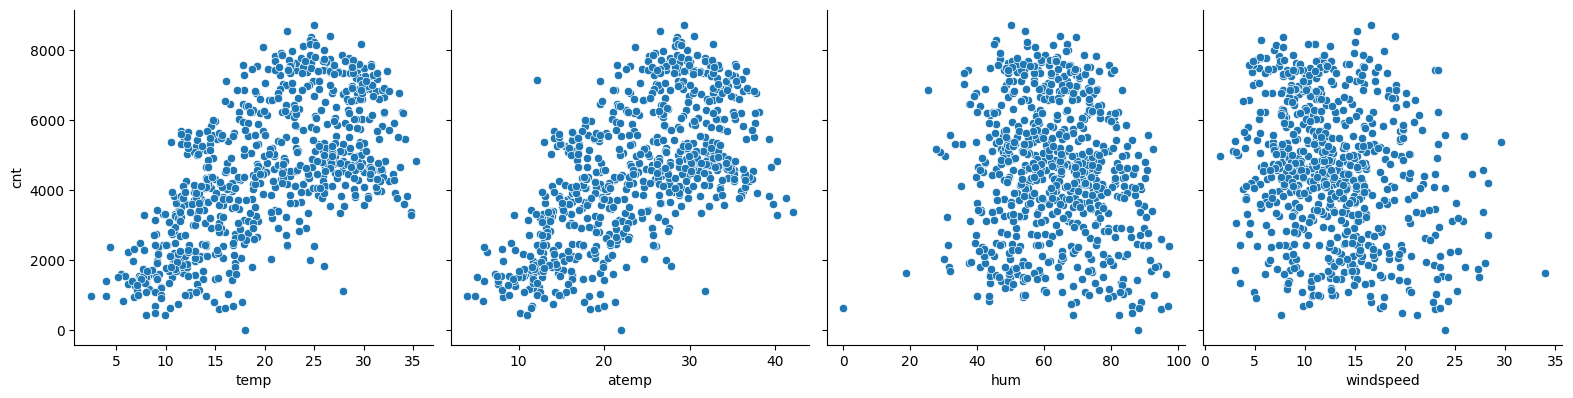

In [617]:
sns.pairplot(data, x_vars=['temp', 'atemp', 'hum', 'windspeed'], y_vars='cnt',size=4, aspect=1, kind='scatter')
plt.show()

Let's draw the heat map for these four variables

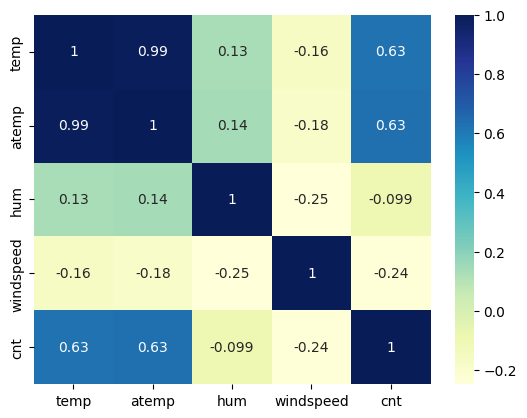

In [618]:
sns.heatmap(data[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr(), cmap="YlGnBu", annot = True)
plt.show()

#### Visualize categorical variables

Let's now pick below columns for **Multivariate Analysis**
- `season_summer` 
- `season_fall`
- `season_winter`

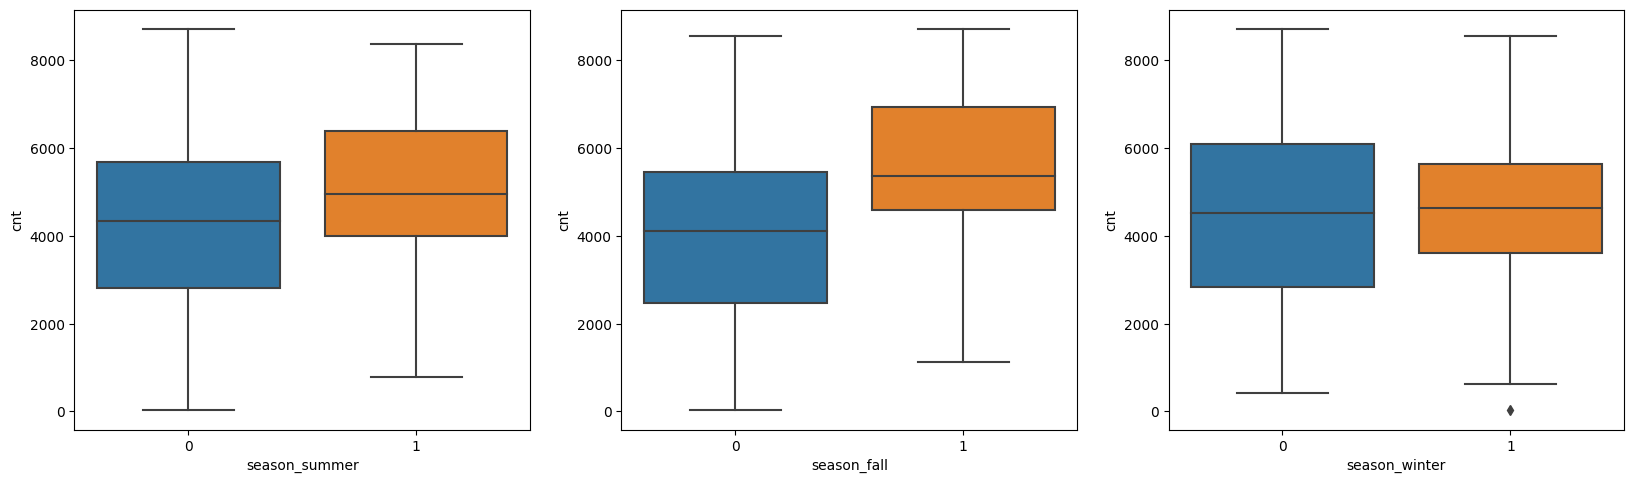

In [619]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season_summer', y = 'cnt', data = data)
plt.subplot(2,3,2)
sns.boxplot(x = 'season_fall', y = 'cnt', data = data)
plt.subplot(2,3,3)
sns.boxplot(x = 'season_winter', y = 'cnt', data = data)
plt.show()

Let's now pick below columns for **Multivariate Analysis**
- `weathersit_clear` 
- `weathersit_misty`

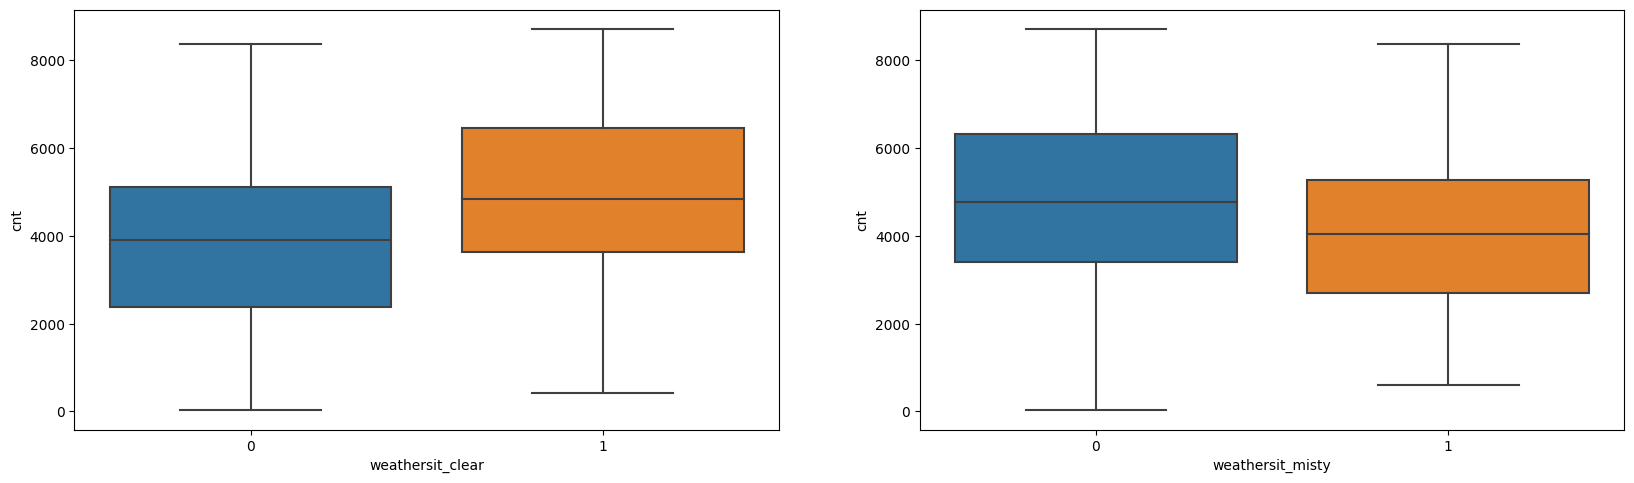

In [620]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'weathersit_clear', y = 'cnt', data = data)
plt.subplot(2,2,2)
sns.boxplot(x = 'weathersit_misty', y = 'cnt', data = data)
plt.show()

Let's now pick below columns for **Multivariate Analysis**
- `weekday_mon` 
- `weekday_tue`
- `weekday_wed`
- `weekday_thu` 
- `weekday_fri`
- `weekday_sat`

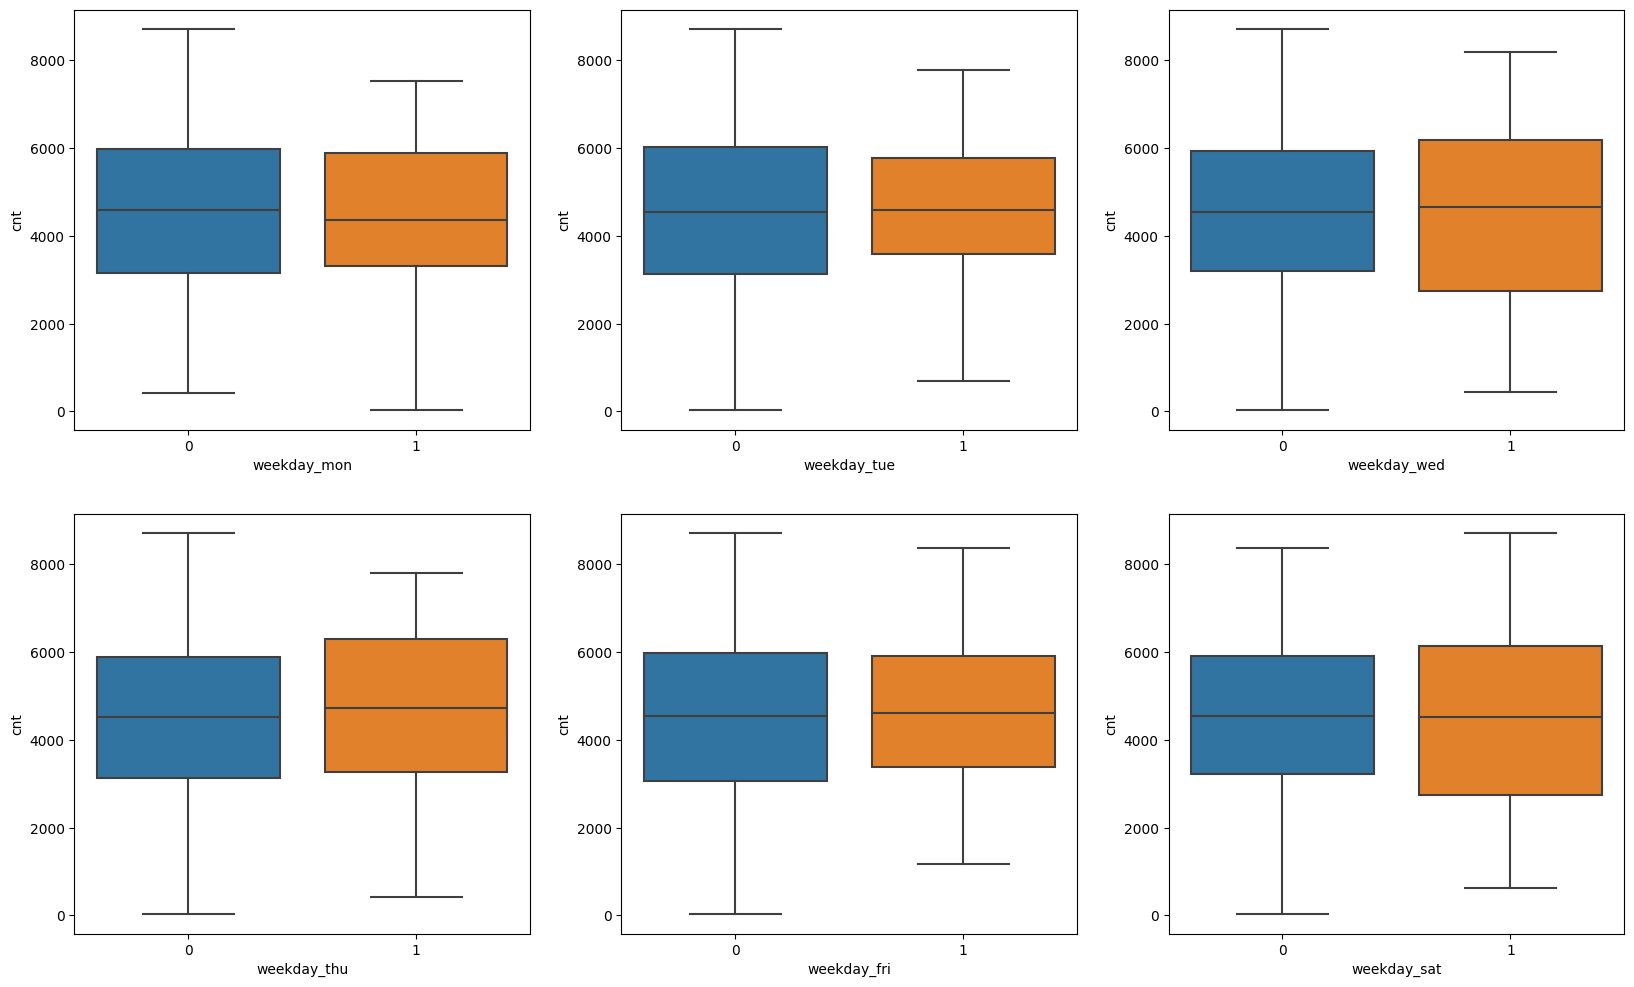

In [621]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'weekday_mon', y = 'cnt', data = data)
plt.subplot(2,3,2)
sns.boxplot(x = 'weekday_tue', y = 'cnt', data = data)
plt.subplot(2,3,3)
sns.boxplot(x = 'weekday_wed', y = 'cnt', data = data)
plt.subplot(2,3,4)
sns.boxplot(x = 'weekday_thu', y = 'cnt', data = data)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday_fri', y = 'cnt', data = data)
plt.subplot(2,3,6)
sns.boxplot(x = 'weekday_sat', y = 'cnt', data = data)
plt.show()

#### EDA Observations
- Continuous Variable Analysis
    - All four variables (`temp`, `atemp`, `hum`, `windspeed`) seems to be related to target variable (`cnt`)
    - Scatter plot for `temp` and `atemp` looks very similar
    - From the heat map
        - `temp` and `atemp` columns are highly correlated to each other.
        - `temp` and `atemp` columns are positively correlated to target variable.
        - `hum` and `windspeed` columns are negatively correlated to target variable.
- Categorical Variable Analysis
    - for summer, fall and winter seasons, median is between 4000 and 6000
    - 25 percentile to 75 percentile range is higher for clear weather compared to misty weather
    - 25 percentile to 75 percentile range is higher for wednesday, thursday and saturday compared to monday, tuesday and friday.

---
## Step 4: Train and Test Data Split

In [622]:
from sklearn.model_selection import train_test_split

# We are splitting data into 70% train data and 30% test data

df_train, df_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

---
## Step 5: Feature Scaling

#### Rescaling the features using Min-Max Scaler

In [623]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [624]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,...,mnth_nov,mnth_dec,weekday_mon,weekday_tue,weekday_wed,weekday_thu,weekday_fri,weekday_sat,weathersit_clear,weathersit_misty
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,1,0,0,0,0,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,...,0,0,0,1,0,0,0,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,0,0,0,1,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,1,0,0,0,0,0,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,0,0,0,0,0,0,1,0,1


#### Dividing into X and y sets for model building

In [625]:
y_train = df_train.pop('cnt')
X_train = df_train

---
## Step 6: Feature Selection and Model Building for Multiple Linear Regression

#### Feature Selection

We will use Recursive Feature Elimination for Feature Selection

In [626]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [627]:
# Running RFE with the output number of the variable equal to 20
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [628]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_summer', False, 10),
 ('season_fall', True, 1),
 ('season_winter', False, 9),
 ('mnth_feb', False, 6),
 ('mnth_mar', False, 4),
 ('mnth_apr', True, 1),
 ('mnth_may', True, 1),
 ('mnth_jun', False, 2),
 ('mnth_jul', False, 3),
 ('mnth_aug', True, 1),
 ('mnth_sep', True, 1),
 ('mnth_oct', True, 1),
 ('mnth_nov', True, 1),
 ('mnth_dec', True, 1),
 ('weekday_mon', True, 1),
 ('weekday_tue', True, 1),
 ('weekday_wed', True, 1),
 ('weekday_thu', True, 1),
 ('weekday_fri', True, 1),
 ('weekday_sat', False, 8),
 ('weathersit_clear', False, 7),
 ('weathersit_misty', False, 5)]

In [629]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_fall', 'mnth_apr', 'mnth_may', 'mnth_aug', 'mnth_sep',
       'mnth_oct', 'mnth_nov', 'mnth_dec', 'weekday_mon', 'weekday_tue',
       'weekday_wed', 'weekday_thu', 'weekday_fri'],
      dtype='object')

#### Building a Linear Model using `statsmodel.api`

In [630]:
import statsmodels.api as sm

By default, the `statsmodels` library fits a line on the dataset which passes through the origin. But in order to have an intercept, we need to manually use the `add_constant` attribute of `statsmodels`. And once we add the constant to our `X_train` dataset, we can go ahead and fit a regression line using the `OLS` (Ordinary Least Squares) attribute of `statsmodels` as shown below

In [631]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [632]:
# Add a constant to get an intercept
X_train_rfe = sm.add_constant(X_train_rfe)

# Fit the resgression line using 'OLS'
lm = sm.OLS(y_train,X_train_rfe).fit()

In [633]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     104.8
Date:                Mon, 10 Jul 2023   Prob (F-statistic):          7.39e-159
Time:                        22:41:56   Log-Likelihood:                 452.22
No. Observations:                 510   AIC:                            -864.4
Df Residuals:                     490   BIC:                            -779.7
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3118      0.030     10.520      

In [634]:
# import the required library
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [635]:
# Let's derive VIF values for the columns
vif = pd.DataFrame()
X_train_vif = X_train_rfe.drop('const', axis=1)
vif['Features'] = X_train_vif.columns
vif['VIF'] = [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
19,weekday_fri,inf
15,weekday_mon,inf
2,workingday,inf
18,weekday_thu,inf
17,weekday_wed,inf
1,holiday,inf
16,weekday_tue,inf
3,temp,394.93
4,atemp,375.11
5,hum,12.14


`weekday_fri` is insignificant in presence of other variables due to high p-value and VIF. Let's drop this column and rebuild the model

In [636]:
X_train_new = X_train_rfe.drop(["weekday_fri"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     104.8
Date:                Mon, 10 Jul 2023   Prob (F-statistic):          7.39e-159
Time:                        22:41:56   Log-Likelihood:                 452.22
No. Observations:                 510   AIC:                            -864.4
Df Residuals:                     490   BIC:                            -779.7
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3118      0.030     10.520      

In [637]:
# Let's derive VIF values for the columns
vif = pd.DataFrame()
X_train_vif = X_train_new.drop('const', axis=1)
vif['Features'] = X_train_vif.columns
vif['VIF'] = [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,394.93
4,atemp,375.11
5,hum,12.14
2,workingday,7.45
7,season_fall,5.26
6,windspeed,4.01
15,weekday_mon,2.30
17,weekday_wed,2.27
18,weekday_thu,2.08
16,weekday_tue,2.05


`atemp` column has a high p-value (`0.483`) and high VIF (`55.09`). Let's drop this column and rebuild the model

In [638]:
X_train_new = X_train_new.drop(["atemp"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     110.7
Date:                Mon, 10 Jul 2023   Prob (F-statistic):          8.84e-160
Time:                        22:41:56   Log-Likelihood:                 451.96
No. Observations:                 510   AIC:                            -865.9
Df Residuals:                     491   BIC:                            -785.5
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3133      0.030     10.605      

In [639]:
# Let's derive VIF values for the columns
vif = pd.DataFrame()
X_train_vif = X_train_new.drop('const', axis=1)
vif['Features'] = X_train_vif.columns
vif['VIF'] = [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,15.80
4,hum,11.97
2,workingday,7.42
6,season_fall,5.20
5,windspeed,3.81
14,weekday_mon,2.28
16,weekday_wed,2.26
17,weekday_thu,2.06
0,yr,2.05
15,weekday_tue,2.04


`workingday` column has a high p-value (`0.134`) and high VIF (`7.42`). Let's drop this column and rebuild the model

In [640]:
X_train_new = X_train_new.drop(["workingday"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     116.8
Date:                Mon, 10 Jul 2023   Prob (F-statistic):          2.45e-160
Time:                        22:41:56   Log-Likelihood:                 450.79
No. Observations:                 510   AIC:                            -865.6
Df Residuals:                     492   BIC:                            -789.4
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3208      0.029     11.006      

In [641]:
# Let's derive VIF values for the columns
vif = pd.DataFrame()
X_train_vif = X_train_new.drop('const', axis=1)
vif['Features'] = X_train_vif.columns
vif['VIF'] = [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,15.77
3,hum,11.60
5,season_fall,5.20
4,windspeed,3.79
0,yr,2.05
8,mnth_aug,1.84
7,mnth_may,1.56
9,mnth_sep,1.51
13,weekday_mon,1.46
10,mnth_oct,1.40


As we can observe `temp`, `hum` and `season_fall` have high VIF but have low p-values. Columns `weekday_mon`, `weekday_tue`, `weekday_wed`, `weekday_thu` have high p-values but within range VIF values. We will give preference to p-value, let's drop column `weekday_tue` as it has the highest p-value (`0.885`) and rebuild the model.

In [642]:
X_train_new = X_train_new.drop(["weekday_tue"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     124.4
Date:                Mon, 10 Jul 2023   Prob (F-statistic):          2.19e-161
Time:                        22:41:57   Log-Likelihood:                 450.78
No. Observations:                 510   AIC:                            -867.6
Df Residuals:                     493   BIC:                            -795.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3212      0.029     11.080      

In [643]:
# Let's derive VIF values for the columns
vif = pd.DataFrame()
X_train_vif = X_train_new.drop('const', axis=1)
vif['Features'] = X_train_vif.columns
vif['VIF'] = [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,15.72
3,hum,11.43
5,season_fall,5.20
4,windspeed,3.78
0,yr,2.04
8,mnth_aug,1.84
7,mnth_may,1.56
9,mnth_sep,1.51
10,mnth_oct,1.40
13,weekday_mon,1.38


As we can observe `temp`, `hum` and `season_fall` have high VIF but have low p-values. Columns `weekday_mon`, `weekday_wed`, `weekday_thu` have high p-values but within range VIF values. We will give preference to p-value, let's drop column `weekday_mon` as it has the highest p-value (`0.827`) and rebuild the model.

In [644]:
X_train_new = X_train_new.drop(["weekday_mon"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     132.9
Date:                Mon, 10 Jul 2023   Prob (F-statistic):          1.91e-162
Time:                        22:41:57   Log-Likelihood:                 450.76
No. Observations:                 510   AIC:                            -869.5
Df Residuals:                     494   BIC:                            -801.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3216      0.029     11.125      

In [645]:
# Let's derive VIF values for the columns
vif = pd.DataFrame()
X_train_vif = X_train_new.drop('const', axis=1)
vif['Features'] = X_train_vif.columns
vif['VIF'] = [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,15.71
3,hum,11.22
5,season_fall,5.20
4,windspeed,3.78
0,yr,2.03
8,mnth_aug,1.84
7,mnth_may,1.56
9,mnth_sep,1.51
10,mnth_oct,1.40
6,mnth_apr,1.31


As we can observe `temp`, `hum` and `season_fall` have high VIF but have low p-values. Columns `weekday_wed`, `weekday_thu` have high p-values but within range VIF values. We will give preference to p-value, let's drop column `weekday_thu` as it has the highest p-value (`0.838`) and rebuild the model.

In [646]:
X_train_new = X_train_new.drop(["weekday_thu"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     142.7
Date:                Mon, 10 Jul 2023   Prob (F-statistic):          1.60e-163
Time:                        22:41:57   Log-Likelihood:                 450.74
No. Observations:                 510   AIC:                            -871.5
Df Residuals:                     495   BIC:                            -808.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3222      0.029     11.207      

In [647]:
vif = pd.DataFrame()
X_train_vif = X_train_new.drop('const', axis=1)
vif['Features'] = X_train_vif.columns
vif['VIF'] = [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,15.67
3,hum,11.19
5,season_fall,5.20
4,windspeed,3.77
0,yr,2.03
8,mnth_aug,1.84
7,mnth_may,1.56
9,mnth_sep,1.51
10,mnth_oct,1.39
6,mnth_apr,1.31


As we can observe `temp`, `hum` and `season_fall` have high VIF but have low p-values. Columns `weekday_wed` have high p-values but within range VIF values. We will give preference to p-value, let's drop column `weekday_wed` as it has the highest p-value (`0.786`) and rebuild the model.

In [648]:
X_train_new = X_train_new.drop(["weekday_wed"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     154.0
Date:                Mon, 10 Jul 2023   Prob (F-statistic):          1.31e-164
Time:                        22:41:58   Log-Likelihood:                 450.70
No. Observations:                 510   AIC:                            -873.4
Df Residuals:                     496   BIC:                            -814.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3225      0.029     11.237      

In [649]:
vif = pd.DataFrame()
X_train_vif = X_train_new.drop('const', axis=1)
vif['Features'] = X_train_vif.columns
vif['VIF'] = [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,15.65
3,hum,11.09
5,season_fall,5.19
4,windspeed,3.77
0,yr,2.03
8,mnth_aug,1.84
7,mnth_may,1.56
9,mnth_sep,1.51
10,mnth_oct,1.39
6,mnth_apr,1.31


So now, we have arrived at a model where with the considered variables:
- p-value is less than 0.05
- R-squared is .806
- Adjusted R-squared is 0.796

`temp` column VIF = `15.65`. Let's drop this column and rebuild the model.

In [440]:
X_train_new = X_train_new.drop(["temp"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     70.77
Date:                Mon, 10 Jul 2023   Prob (F-statistic):           2.46e-99
Time:                        22:21:27   Log-Likelihood:                 292.60
No. Observations:                 510   AIC:                            -559.2
Df Residuals:                     497   BIC:                            -504.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.5340      0.037     14.623      

In [441]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,6.48
3,windspeed,3.65
4,season_fall,2.81
0,yr,1.94
7,mnth_aug,1.84
8,mnth_sep,1.49
9,mnth_oct,1.35
6,mnth_may,1.33
10,mnth_nov,1.30
11,mnth_dec,1.30


As can be observed that after dropping `temp` column, values for R-squared and Adjusted R-squared comes down to 0.631 and 0.622 respectively.
Let's try to drop `hum` column instead of `temp` column.<br>
**Please note all the cells before the step where `temp` column is dropped. To re-include `temp` column.**

In [505]:
X_train_new = X_train_new.drop(["hum"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     128.2
Date:                Mon, 10 Jul 2023   Prob (F-statistic):          1.36e-143
Time:                        22:22:58   Log-Likelihood:                 398.09
No. Observations:                 510   AIC:                            -770.2
Df Residuals:                     497   BIC:                            -715.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0917      0.021      4.394      

In [506]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,9.14
4,season_fall,4.84
3,windspeed,3.33
0,yr,2.03
7,mnth_aug,1.82
6,mnth_may,1.56
8,mnth_sep,1.43
9,mnth_oct,1.35
5,mnth_apr,1.31
10,mnth_nov,1.23


As can be observed that after dropping `hum` column, values for R-squared and Adjusted R-squared improves and comes to 0.756 and 0.750 respectively.
Let's try to keep both `hum` and `temp` and drop `season_fall`.<br>
**Please note all the cells were re-executed before the step where `temp` column is dropped. To re-include `temp` and `hue` columns.**

In [650]:
X_train_new = X_train_new.drop(["season_fall"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     159.5
Date:                Mon, 10 Jul 2023   Prob (F-statistic):          1.03e-161
Time:                        22:42:17   Log-Likelihood:                 441.17
No. Observations:                 510   AIC:                            -856.3
Df Residuals:                     497   BIC:                            -801.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3336      0.029     11.466      0.0

This certainly is a much better result. As can be observed that after dropping `season_fall` column, values for R-squared and Adjusted R-squared improves and comes to `0.794` and `0.789` respectively. But we have another column where p-value > 0.05, this column is `mnth_aug`. Let's drop `mnth_aug` and rebuild the model.

In [651]:
X_train_new = X_train_new.drop(["mnth_aug"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     172.9
Date:                Mon, 10 Jul 2023   Prob (F-statistic):          3.74e-162
Time:                        22:42:46   Log-Likelihood:                 439.52
No. Observations:                 510   AIC:                            -855.0
Df Residuals:                     498   BIC:                            -804.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3278      0.029     11.312      0.0

There is not much impact after dropping `mnth_aug` column on R-squared and Adjusted R-squared. Their values improves and comes to 0.792 and 0.788 respectively. Let's check the VIF once again.

In [652]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,10.36
2,temp,7.29
4,windspeed,3.64
0,yr,2.01
10,mnth_dec,1.28
9,mnth_nov,1.24
7,mnth_sep,1.23
8,mnth_oct,1.23
6,mnth_may,1.22
5,mnth_apr,1.19


Let's drop `hum` column and re-run the model

In [653]:
X_train_new = X_train_new.drop(["hum"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     150.6
Date:                Mon, 10 Jul 2023   Prob (F-statistic):          1.08e-143
Time:                        22:43:04   Log-Likelihood:                 393.16
No. Observations:                 510   AIC:                            -764.3
Df Residuals:                     499   BIC:                            -717.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1058      0.020      5.218      0.0

In [654]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.63
3,windspeed,3.07
0,yr,2.00
6,mnth_sep,1.20
4,mnth_apr,1.19
5,mnth_may,1.18
8,mnth_nov,1.14
7,mnth_oct,1.13
9,mnth_dec,1.09
1,holiday,1.05


So, we have ended up with 10 variables in our Linear Regression model with expected p-values and VIFs for considered columns. With above model calculated R-squared and Adj. R-squared values are 0.751 and 0.746 respectively. Let's proceed with the residual analysis of trained data.

#### Residual analysis of the trained data
To validate assumptions of the model, and hence the reliability for inference

#### Distribution of the error terms
We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [655]:
y_train_pred = lm.predict(X_train_lm)
res = (y_train - y_train_pred)

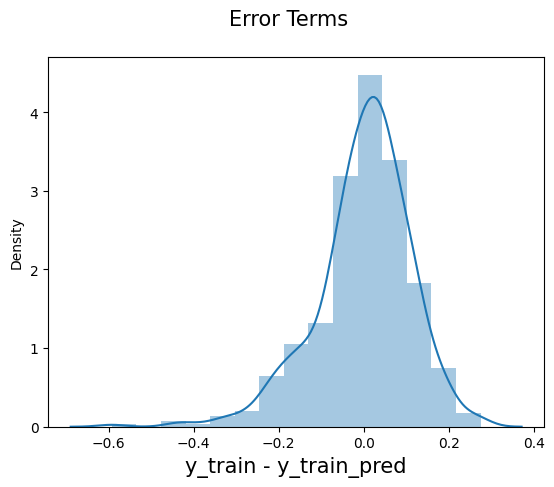

In [656]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

The residuals are following the normally distributed with a mean 0. All good!

---
## Step 7: Evaluation on test data

#### Apply scaling on test data by using only `tranform` method

In [657]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,...,mnth_nov,mnth_dec,weekday_mon,weekday_tue,weekday_wed,weekday_thu,weekday_fri,weekday_sat,weathersit_clear,weathersit_misty
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,1,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,1,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,1,...,0,0,0,0,1,0,0,0,1,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,1,0,...,0,0,0,0,0,1,0,0,1,0


#### Dividing into X_test and y_test

In [658]:
y_test = df_test.pop('cnt')
X_test = df_test

In [659]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_train_new = X_train_new.drop('const', axis=1)
X_test_new = X_test[X_train_new.columns]
X_test_new.head()


,yr,holiday,temp,windspeed,mnth_apr,mnth_may,mnth_sep,mnth_oct,mnth_nov,mnth_dec
184,0,1,0.831783,0.084219,0,0,0,0,0,0
535,1,0,0.901354,0.153728,0,0,0,0,0,0
299,0,0,0.511964,0.334206,0,0,0,1,0,0
221,0,0,0.881625,0.339570,0,0,0,0,0,0
152,0,0,0.817246,0.537414,0,0,0,0,0,0


In [660]:
# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [661]:
# Making predictions
y_pred = lm.predict(X_test_new)

#### Model Evaluation

Text(0, 0.5, 'y_pred')

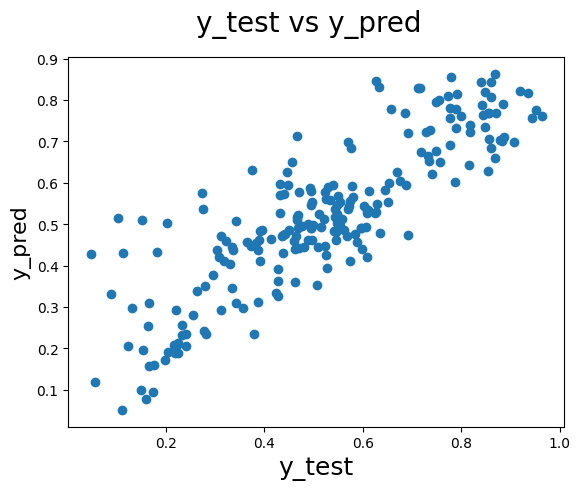

In [662]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

We are confident that the model fit isn't by chance, and has decent predictive power. The normality of residual terms allows some inference on the coefficients.

Although, the variance of residuals increasing with X indicates that there is significant variation that this model is unable to explain.

In [665]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

##### Looking at the RMSE

In [666]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

0.1138230623241755

##### Checking the R-squared on the test set

In [667]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.7272245694639087